# ディープニューラルネットワーク

## 【事前準備】

In [42]:
# scikit-learnの「set_config(display="diagram")」を使用するため、scikitlearnを最新verに更新
# !pip install scikit-learn==0.23.2 --target drive/My\ Drive/MyModule
# !pip install scikit-learn==0.23.2
# !pip list
## Google Drive上にインストールしたモジュールのインポート##
import sys
sys.path.append('/content/drive/My Drive/MyModule')

In [43]:
## モジュールのインポート ##
# 一般
import random
import math
# データ分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
# 決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
# Keras
from keras.datasets import mnist
# その他
from google.colab import drive #GoogleDriveモジュール
# drive.mount('/content/drive') #GoogleDriveのマウント

## 【実装】

### ●MNISTのデータセット

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

# 各画像のピクセルデータを平滑化（28x28 ⇒ 784x1）
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

(60000, 28, 28)
(10000, 28, 28)
uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


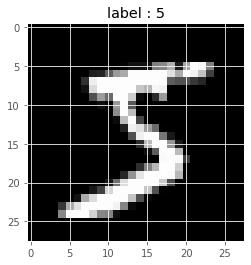

In [45]:
## 画像を可視化 ##
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

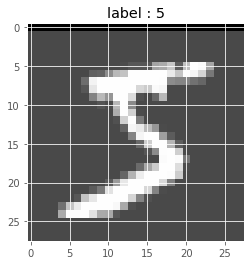

[[-105.35 -105.35 -105.35 ... -105.35 -105.35 -105.35]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]
 [   0.      0.      0.   ...    0.      0.      0.  ]]


In [46]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
# image -= 105.35 # 意図的に負の小数値を作り出してみる
image[0] = -105.35 # 意図的に負の小数値を作り出してみる

# 自動スケーリングあり
plt.imshow(image, 'gray')   # 最小値が0となるように自動的にスケーリングされる
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image[:10]) # 値を確認

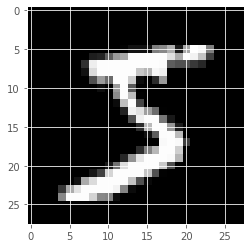

In [47]:
# 自動スケーリング無し
plt.imshow(image, 'gray', vmin = 0, vmax = 255);   # 範囲外の値は0 or 255に置換される (自動スケールされない)

In [48]:
## 画像データを正規化 ##
# X_train1 = X_train.astype(np.float) / 255
# X_test1 = X_test.astype(np.float) / 255
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
print(X_train_transformed.max()) # 1.0
print(X_test_transformed.min()) # 0.0

1.0
0.0


In [49]:
## One Hot Encoding ##
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(y_train)
print(y_train_one_hot)

(60000,)
(60000, 10)
float64
[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [50]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_transformed, y_train, train_size=0.8, random_state=0)
# print(X_train1.shape) # (48000, 784)
# print(X_test1.shape) # (12000, 784)
# print(y_train1.shape) # (48000,)
# print(y_test1.shape) # (12000,)


X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train_transformed, y_train, train_size=0.99, random_state=0)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_transformed[:6000, :], y_train[:6000], train_size=0.8, random_state=0)
print(X_train2.shape) # (4800, 784)
print(X_test2.shape) # (1200, 784)
print(y_train2.shape) # (4800,)
print(y_test2.shape) # (1200,)

(59400, 784)
(600, 784)
(59400,)
(600,)
(4800, 784)
(1200, 784)
(4800,)
(1200,)


In [51]:
y_train1

array([4, 4, 7, ..., 7, 1, 4], dtype=uint8)

### ●ScratchDeepNeuralNetrowkClassifierクラス（レイヤ数:6）

In [52]:
class ScratchDeepNeuralNetrowkClassifier():
    """
    ディープニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, layer_list, epoch, batch_size, early_stop=None, random_state=None, verbose=True):
        self.verbose = verbose
        self.flag = 0
        self.layer_list = layer_list    # 各層のリスト（fitメソッドにて各層のクラスをインスタンス化）
        self.layer_num = len(layer_list)   # 層の数
        self.epoch = epoch  # エポック
        self.batch_size = batch_size    # バッチサイズ
        self.early_stop = early_stop    # 早期打ち切りのイテレーション回数
        self.random_state = random_state
        np.random.seed(random_state)   #乱数シードを設定
        self.enc = OneHotEncoder(handle_unknown='ignore', sparse=False)   # OneHotエンコーダ
        self.loss = np.array([])    # 損失関数（学習データ）
        self.val_loss = np.array([])    # 損失関数（検証データ）

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        n_samples = X.shape[0]    # サンプル数
        counter = 0   # 早期終了用のカウンタ

        # 学習に使用する各種変数を初期化
        self._init_variables(X)

        # 学習データの目的変数をOneHotエンコーディング
        Y = self.enc.fit_transform(y[:, np.newaxis])
        # ミニバッチ学習用のクラス作成
        get_mini_batch = GetMiniBatch(X, Y, batch_size=self.batch_size, seed=self.random_state)

        # 検証データも与えられている場合
        if ((X_val is not None) and (y_val is not None)):
            # OneHotエンコーディング
            Y_val = enc.transform(y_val[:, np.newaxis])

         
        # エポックの回数ループ
        for j in range(self.epoch):
            if self.verbose:   print("■エポック{}回目".format(j))   # デバッグ情報出力
            get_mini_batch.__iter__()  # ミニバッチのイテレータをリセット

            # 全バッチデータを学習完了するまでループ（＝イテレーションの回数）
            for i, (X_mini, Y_mini) in enumerate(get_mini_batch):
                if self.verbose:   print("■イテレーション{}回目".format(i))   # デバッグ情報出力
                # 入力層から出力層までの順伝播処理および逆伝播処理
                Zout = self._exec_propagation(X_mini, Y_mini)
                # 損失関数
                self.loss = np.append(self.loss, self._calcurate_loss(Y_mini, Zout))

                # 検証データも与えられている場合は検証データに対しても同様の処理を行う
                if ((X_val is not None) and (y_val is not None)):
                    # 入力層から出力層までの順伝播処理
                    Zout_val = self._exec_forward_propagation(X_val)
                    # 損失関数
                    self.val_loss = np.append(self.val_loss, self._calcurate_loss(Y_val, Zout_val))

                # 早期終了のイテレーション回数が設定されている場合、カウンタをインクリメント
                if (self.early_stop is not None):
                    counter += 1
                    # カウンタが設定値に到達したら学習を強制終了
                    if (counter >= self.early_stop):
                        break

            # カウンタが設定値に到達したら学習を強制終了
            if (self.early_stop is not None):
                if (counter >= self.early_stop):
                    break

        if self.verbose:   print("■学習完了")
        return

    def predict(self, X):
        """
        DNN分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        y_pred    次の形のndarray, shape (n_samples, )
            ラベルの推定値
        """
        Z = self._exec_forward_propagation(X)   # 順伝播処理
        y_pred = np.argmax(Z, axis=1)   
        return  y_pred

    def predict_proba(self, X):
        """
        DNN分類器を使い推定値の確率を出力する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        y_pred_proba    次の形のndarray, shape (n_samples, n_output)
            ラベルの各クラスごとの確率の推定値
        """
        y_pred_proba = self._exec_forward_propagation(X)   # 順伝播処理
        return  y_pred_proba

    def plot_learning_curve(self):
        """
        学習曲線をプロットする関数
        Parameters
        ----------
        None
        Returns
        -------
        None
        """
        # 学習データと検証データのそれぞれの損失関数の値をグラフに描画
        fig, ax = plt.subplots(figsize=(15, 10), dpi=50)
        ax.set_title("Learning Curve")
        ax.set_xlabel("Iteration Number")
        ax.set_ylabel("Loss")
        ax.plot(self.loss, color = "blue", label="train")
        ax.plot(self.val_loss, color = "red", label="validation")
        ax.legend(loc='best') # 凡例を最適位置に表示
        plt.show()
        return

    def _init_variables(self, X):
        """
        学習に使用する各種変数を初期化する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            特徴量データ
        Returns
        -------
        None
        """
        if self.verbose:   print("■_init_variablesメソッド開始")  # デバッグ情報出力
        n_samples = X.shape[0]    # サンプル数

        self.iter = int(n_samples / self.batch_size)   # イテレーション数
        self.layer = [LayerClass(**keywards) for LayerClass, keywards in self.layer_list]    # 各層のインスタンスのリスト

        if self.verbose:   print("■_init_variablesメソッド終了")  # デバッグ情報出力
        return

    def _exec_propagation(self, X, Y):
        """
        順伝播処理および逆伝播処理を実行する（学習データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Y : 次の形のndarray, shape (batch_size, n_output)
            訓練データの正解値(OneHotEncoding済み)
        Returns
        -------
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_propagationメソッド開始")

        # 順伝播処理
        A1 = self.layer[0].forward(X)                # FullyConnectedLayer
        Z1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
        A2 = self.layer[2].forward(Z1)               # FullyConnectedLayer
        Z2 = self.layer[3].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
        A3 = self.layer[4].forward(Z2)               # FullyConnectedLayer
        Zout = self.layer[5].forward(A3)             # SoftmaxLayer
        
        # 逆伝播処理
        dA3 = self.layer[5].backward(Zout, Y)        # SoftmaxLayer
        dZ2 = self.layer[4].backward(dA3, Z2)        # FullyConnectedLayer
        dA2 = self.layer[3].backward(A2, dZ2)        # SigmoidLayer or TanhLayer or ReLU
        dZ1 = self.layer[2].backward(dA2, Z1)        # FullyConnectedLayer
        dA1 = self.layer[1].backward(A1, dZ1)        # SigmoidLayer or TanhLayer or ReLU
        _   = self.layer[0].backward(dA1, X)         # FullyConnectedLayer

        if self.verbose:   print("■_exec_propagationメソッド終了")    # デバッグ情報出力
        return  Zout

    def _exec_forward_propagation(self, X):
        """
        入力層から出力層まで順伝播処理を実行する（検証データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Returns
        -------
        Zout : 次の形のndarray, shape (batch_size, n_output)
            出力層の出力
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_forward_propagationメソッド開始")

        # 順伝播処理
        A1 = self.layer[0].forward(X)                # FullyConnectedLayer
        Z1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
        A2 = self.layer[2].forward(Z1)               # FullyConnectedLayer
        Z2 = self.layer[3].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
        A3 = self.layer[4].forward(Z2)               # FullyConnectedLayer
        Zout = self.layer[5].forward(A3)             # SoftmaxLayer

        if self.verbose:   print("■_exec_forward_propagationメソッド終了")    # デバッグ情報出力
        return Zout

    def _calcurate_loss(self, Y, Z):
        """
        損失関数（交差エントロピー誤差: L = -1/(batch_size)*ΣΣy_jk*log(Z_jk)）の計算
        Parameters
        ----------
        Y : 次の形のndarray, shape (batch_size, n_output)
            正解ラベルデータ（OneHotEncoding済み）
        Z : 次の形のndarray, shape (batch_size, n_output)
            出力層での出力値
        Returns
        ----------
        loss : numpy.float
          損失関数(交差エントロピー誤差)
        """
        batch_size = Y.shape[0]
        n_output = Y.shape[1]
        sigma = 0

        sigma = (Y * np.log(Z)).sum()   # ΣΣy_jk*log(Z_jk)の計算
        loss = - (1 / batch_size) * sigma
        return  loss

### ●ScratchDeepNeuralNetrowkClassifierクラス（レイヤ数:8）

In [53]:
class ScratchDeepNeuralNetrowkClassifierLayer8(ScratchDeepNeuralNetrowkClassifier):
    """
    ディープニューラルネットワーク分類器(層の数:8)
    Parameters
    ----------
    Attributes
    ----------
    """
    def _exec_propagation(self, X, Y):
        """
        順伝播処理および逆伝播処理を実行する（学習データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Y : 次の形のndarray, shape (batch_size, n_output)
            訓練データの正解値(OneHotEncoding済み)
        Returns
        -------
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_propagationメソッド開始")

        # 順伝播処理
        A1 = self.layer[0].forward(X)                # FullyConnectedLayer
        Z1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
        A2 = self.layer[2].forward(Z1)               # FullyConnectedLayer
        Z2 = self.layer[3].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
        A3 = self.layer[4].forward(Z2)               # FullyConnectedLayer
        Z3 = self.layer[5].forward(A3)               # SigmoidLayer or TanhLayer or ReLU
        A4 = self.layer[6].forward(Z3)               # FullyConnectedLayer
        Zout = self.layer[7].forward(A4)             # SoftmaxLayer

        # 逆伝播処理
        dA4 = self.layer[7].backward(Zout, Y)        # SoftmaxLayer
        dZ3 = self.layer[6].backward(dA4, Z3)        # FullyConnectedLayer
        dA3 = self.layer[5].backward(A3, dZ3)        # SigmoidLayer or TanhLayer or ReLU
        dZ2 = self.layer[4].backward(dA3, Z2)        # FullyConnectedLayer
        dA2 = self.layer[3].backward(A2, dZ2)        # SigmoidLayer or TanhLayer or ReLU
        dZ1 = self.layer[2].backward(dA2, Z1)        # FullyConnectedLayer
        dA1 = self.layer[1].backward(A1, dZ1)        # SigmoidLayer or TanhLayer or ReLU
        _   = self.layer[0].backward(dA1, X)         # FullyConnectedLayer

        if self.verbose:   print("■_exec_propagationメソッド終了")    # デバッグ情報出力
        return  Zout

    def _exec_forward_propagation(self, X):
        """
        入力層から出力層まで順伝播処理を実行する（検証データ用）
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量データ
        Returns
        -------
        Zout : 次の形のndarray, shape (batch_size, n_output)
            出力層の出力
        """
        # デバッグ情報出力
        if self.verbose:   print("■_exec_forward_propagationメソッド開始")

        # 順伝播処理
        A1 = self.layer[0].forward(X)                # FullyConnectedLayer
        Z1 = self.layer[1].forward(A1)               # SigmoidLayer or TanhLayer or ReLU
        A2 = self.layer[2].forward(Z1)               # FullyConnectedLayer
        Z2 = self.layer[3].forward(A2)               # SigmoidLayer or TanhLayer or ReLU
        A3 = self.layer[4].forward(Z2)               # FullyConnectedLayer
        Z3 = self.layer[5].forward(A3)               # SigmoidLayer or TanhLayer or ReLU
        A4 = self.layer[6].forward(Z3)               # FullyConnectedLayer
        Zout = self.layer[7].forward(A4)             # SoftmaxLayer

        if self.verbose:   print("■_exec_forward_propagationメソッド終了")    # デバッグ情報出力
        return Zout

### ●GetMiniBatchクラス

In [54]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        self._counter = 0
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
            # print("Warning: バッチデータが最後に達しました！　データの先頭に戻ります!!!(self._counter = {})".format(self._counter))
            # self._counter = 0
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


## ミニバッチデータを取得するサンプルコード ##
get_mini_batch = GetMiniBatch(X_train1, y_train1, batch_size=20, seed=0)
# get_mini_batch = GetMiniBatch(X_test1, y_test1, batch_size=20, seed=0)
print("len(get_mini_batch):")
print(len(get_mini_batch)) # 2400
print("get_mini_batch[5]:")
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
# for i, (mini_X_train, mini_y_train) in enumerate(get_mini_batch):
#     # このfor文内でミニバッチが使える
#     # print("■{}番目のmini_X_train".format(i))
#     # print(mini_X_train[0])
#     pass

get_mini_batch.__iter__()
for i in range(2):
    mini_X_train, mini_y_train = get_mini_batch.__next__()
    print(mini_X_train, mini_y_train)

len(get_mini_batch):
2970
get_mini_batch[5]:
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([1, 2, 3, 9, 0, 9, 4, 0, 2, 7, 1, 3, 4, 4, 4, 7, 9, 9, 2, 5],
      dtype=uint8))
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [9 6 8 2 9 7 0 7 2 7 4 5 8 9 6 3 2 0 7 5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [4 5 7 6 3 2 6 8 3 3 9 3 4 8 8 3 1 9 8 7]


### ●FullyConnectedLayerクラス

In [55]:
class FullyConnectedLayer:
    """
    ノード数n_nodes_prevからn_nodes_currentへの全結合層
    Parameters
    ----------
    n_nodes_prev : int
      前の層のノード数
    n_nodes_current : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes_prev, n_nodes_current, initializer, optimizer):
        self.n_nodes_prev = n_nodes_prev
        self.n_nodes_current = n_nodes_current
        self.initializer = initializer  # WとBの初期化に使用
        self.optimizer = optimizer  # WとBの更新時に使用
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W =self.initializer.init_W(n_nodes_prev, n_nodes_current) # 重み
        self.B =self.initializer.init_B(n_nodes_prev, n_nodes_current) # バイアス
        self.W_log = np.array([])
        self.B_log = np.array([])
        self.flag = 1

    def forward(self, Zprev):
        """
        フォワード
        Parameters
        ----------
        Zprev : 次の形のndarray, shape (batch_size, n_nodes_prev)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes_current)
            出力
        """
        A = (Zprev @ self.W) + self.B.reshape(1, self.B.shape[0])
        return A

    def backward(self, dA, Zprev):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes_current)
            後ろから流れてきた勾配
        Zprev : 次の形のndarray, shape (batch_size, prev_node_num)
            前層の出力Z（当層が第2層の場合、Zprev=Z1）
        Returns
        ----------
        dZprev : 次の形のndarray, shape (batch_size, prev_node_num)
            前に流す勾配
        """
        dW = Zprev.T @ dA
        dB = dA.sum(axis=0)
        dZprev = dA @ self.W.T

        # 更新
        self.W = self.optimizer.update(self.W, dW, "W")
        self.B = self.optimizer.update(self.B, dB, "B")

        # パラメータの一部のみログに記録
        if (self.flag == 1):
            self.W_log = self.W[0, :2].reshape(1, -1)
            self.B_log = self.B[:2].reshape(1, -1)
            self.flag = 0
        else:
            self.W_log = np.append(self.W_log, self.W[0, :2].reshape(1, -1), axis=0)
            self.B_log = np.append(self.B_log, self.B[:2].reshape(1, -1), axis=0)

        return dZprev

### ●SigmoidLayerクラス

In [56]:
class SigmoidLayer:
    """
    シグモイド関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose):
        self.verbose = verbose
        
    def forward(self, A):
        """
        順伝播処理
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■シグモイド関数（順伝播）実行")   # デバッグ情報出力
        Z = self._sigmoid_func(A)
        return Z

    def backward(self, A, dZ):
        """
        逆伝播処理
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■シグモイド関数（逆伝播）実行")   # デバッグ情報出力
        dA = dZ * (1 - self._sigmoid_func(A)) * self._sigmoid_func(A)
        return dA

    def _sigmoid_func(self, A):
        """
        シグモイド関数(1/(1+exp(-A)))の演算処理
        Parameters
        ----------
        Returns
        -------
        """
        Z = 1/(1 + np.exp(-A))
        return Z

### ●TanhLayerクラス

In [57]:
class TanhLayer:
    """
    ハイパボリックタンジェント関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose):
        self.verbose = verbose
        
    def forward(self, A):
        """
        順伝播処理((exp(A)-exp(-A))/(exp(A)+exp(-A)))
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ハイパボリックtan関数（順伝播）実行")   # デバッグ情報出力
        Z = self._tanh_func(A)
        return Z

    def backward(self, A, dZ):
        """
        逆伝播処理
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ハイパボリックtan関数（逆伝播）実行")   # デバッグ情報出力
        dA = dZ * (1 - self._tanh_func(A)* self._tanh_func(A)) 
        return dA

    def _tanh_func(self, A):
        """
        ハイパボリックtan関数((exp(A)-exp(-A))/(exp(A)+exp(-A)))の演算処理
        Parameters
        ----------
        Returns
        -------
        """
        Z = (np.exp(A) - np.exp(-A)) / (np.exp(A) + np.exp(-A))
        return Z

### ●ReLULayerクラス

In [58]:
class ReLULayer:
    """
    ReLU関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose):
        self.verbose = verbose
        
    def forward(self, A):
        """
        順伝播処理
            # df(x)/dx = { x (x > 0)
            #            { 0 (x <= 0)
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ReLU関数（順伝播）実行")   # デバッグ情報出力
        # Z = np.where(A > 0, A, 0)
        self.mask = (A <= 0)
        Z = A.copy()
        Z[self.mask] = 0
        return Z

    def backward(self, A, dZ):
        """
        逆伝播処理
            # df(x)/dx = { 1 (x > 0)
            #            { 0 (x <= 0)
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ReLU関数（逆伝播）実行")   # デバッグ情報出力
        # dA = np.where(A > 0, 1, 0)
        dZ[self.mask] = 0
        dA = dZ
        return dA

### ●SoftmaxLayerクラス

In [59]:
class SoftmaxLayer:
    """
    ソフトマックス関数の層
    Parameters
    ----------
    """
    def __init__(self, verbose):
        self.verbose = verbose

    def forward(self, A):
        """
        順伝播処理(Z_k = (exp(A_k)/(Σexp(A_i))
        Parameters
        ----------
        Returns
        ----------
        """
        if self.verbose:   print("■ソフトマックス関数実行")   # デバッグ情報出力
        batch_size = A.shape[0]   # バッチサイズ
        n_nodes_current = A.shape[1]    # 当層のノード数（＝目的変数のクラス数）
        Z = np.zeros((batch_size, n_nodes_current))

        sigma = np.exp(A).sum(axis=1)   # "Σexp(A_i) (i=1～10)"の部分の計算
        Z = (np.exp(A)) / sigma.reshape(-1, 1)
        return Z

    def backward(self, Z, Y):
        """
        逆伝播処理
        Parameters
        ----------
          Z : 順伝播処理の出力
          Y : 目的変数（OneHotEncoding済み）
        Returns
        ----------
          dA
        """
        if self.verbose:   print("■ソフトマックス関数（逆伝播）実行")   # デバッグ情報出力
        batch_size = Z.shape[0]   # バッチサイズ
        dA = (1 / batch_size) * (Z - Y)
        return dA

### ●SimpleInitializerクラス

In [60]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def init_W(self, n_nodes_prev, n_nodes_current):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes_prev, n_nodes_current)
        
        return W

    def init_B(self, n_nodes_prev, n_nodes_current):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(n_nodes_current)
        return B

### ●XavierInitializerクラス

In [61]:
class XavierInitializer:
    """
    「Xavierの初期値」による初期化（シグモイド関数・ハイパボリックタンジェント関数の層で使用）
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self):
        pass
        
    def init_W(self, n_nodes_prev, n_nodes_current):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = (1 / np.sqrt(n_nodes_prev)) * np.random.randn(n_nodes_prev, n_nodes_current)
        return W

    def init_B(self, n_nodes_prev, n_nodes_current):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = (1 / np.sqrt(n_nodes_prev)) * np.random.randn(n_nodes_current)
        return B

### ●HeInitializerクラス

In [62]:
class HeInitializer:
    """
    「Heの初期値」による初期化（ReLU関数の層で使用）
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self):
        pass
        
    def init_W(self, n_nodes_prev, n_nodes_current):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        W = (np.sqrt(2 / n_nodes_prev)) * np.random.randn(n_nodes_prev, n_nodes_current)
        return W
        
    def init_B(self, n_nodes_prev, n_nodes_current):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes_prev : int
          前の層のノード数
        n_nodes_current : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        B = (np.sqrt(2 / n_nodes_prev)) * np.random.randn(n_nodes_current)
        return B

### ●SGDクラス

In [63]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, param, grad, param_name):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        param : 更新前の層のインスタンス (shape: (n_nodes_prev, n_nodes_current))
        grad : 勾配 (shape: (n_nodes_prev, n_nodes_current))
        param_name : パラメータの名称   ※SGDでは未使用
        """
        ret_param = param - self.lr * grad
        return ret_param

### ●AdaGradクラス

In [64]:
class AdaGrad:
    """
    AdaGradによるパラメータの更新
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        self.flag = 1
        self.H = {}

    def update(self, param, grad, param_name):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        param : 更新前の層のインスタンス (shape: (n_nodes_prev, n_nodes_current))
        grad : 勾配 (shape: (n_nodes_prev, n_nodes_current))
        param_name : パラメータの名称
        """
        # 初回のみ
        if (param_name not in self.H):
            dic = {param_name : grad * grad + 1e-7}   # 0割防止のため1e-7を加算
        # 2回目以降
        else:
            dic = {param_name : (self.H[param_name] + grad * grad)}   # 前回までのself.H[param_name]にgrad * gradを加算
        self.H.update(dic)    # self.H[param_name]の値を更新
        ret_param = param -  self.lr * (1 / np.sqrt(self.H[param_name])) *grad
        # print("AdaGradの勾配の2乗和:")
        # print((1 / np.sqrt(self.H[param_name]))[0])
        return ret_param

### ●推定器の評価指標を記録するスコアボードのクラス

In [65]:
## 推定器の指標値を記録するスコアボードのクラス ##
class ScoreBoard():
    def __init__(self, name1=None, name2=None):
        self.df_score = pd.DataFrame([])   # 各指標値を記録するDataFrame
        self.confusion_matrix_dic = {}   # 混同行列の辞書
        if (name1 is None):   name1 = ""
        if (name2 is None):   name2 = ""
        self.name1 = name1
        self.name2 = name2
        print("{}スコアボード{}が生成されました。".format(self.name1, self.name2))

    def calcurate_scores(self, arg_y_true, arg_y_predict, arg_y_predict_proba=None, arg_columns=None):

        if ((len(np.unique(arg_y_true)) <= 2) and (len(np.unique(arg_y_predict)) <= 2)):
            # 2値分類の評価指標
            accuracy = accuracy_score(arg_y_true, arg_y_predict)    # Accuracy（正解率）
            precision = precision_score(arg_y_true, arg_y_predict)    #Precision（適合率）
            recall = recall_score(arg_y_true, arg_y_predict)    #Recall（再現率）
            f1 = f1_score(arg_y_true, arg_y_predict)    #F値
        else:
            # 3値以上の分類の評価指標
            accuracy = accuracy_score(arg_y_true, arg_y_predict)    # Accuracy（正解率）
            precision = precision_score(arg_y_true, arg_y_predict, average="macro")    #Precision（適合率）
            recall = recall_score(arg_y_true, arg_y_predict, average="macro")    #Recall（再現率）
            f1 = f1_score(arg_y_true, arg_y_predict, average="macro")    #F値

        #AUC
        if (arg_y_predict_proba is not None):
            roc_auc = roc_auc_score(arg_y_true, arg_y_predict_proba)
            score_list = [accuracy, precision, recall, f1, roc_auc]
            index_list = ["Accuacy", "Precision", "Recall", "F1", "ROC_AUC"]
        else:
            score_list = [accuracy, precision, recall, f1]
            index_list = ["Accuacy", "Precision", "Recall", "F1"]

        #Confusion matrix（混同行列）
        print("\n")
        print("###Confusion matrix（混同行列）###")
        matrix = confusion_matrix(arg_y_true, arg_y_predict)
        df_confusion_matrix = pd.DataFrame(matrix)
        dic = {arg_columns:df_confusion_matrix}
        self.confusion_matrix_dic.update(dic)   # 評価名称をキーにして混同行列を辞書へ追加
        display(df_confusion_matrix)

        #指標値の比較用テーブルに登録
        # if(self.df_score.empty):
        #     self.df_score = pd.DataFrame([accuracy, precision, recall, f1, roc_auc], index=["Accuacy", "Precision", "Recall", "F1", "ROC_AUC"], columns=[arg_columns])
        # else:
        df_score_temp = pd.DataFrame(data=score_list, index=index_list, columns=[arg_columns])
        self.df_score = pd.concat([self.df_score, df_score_temp], axis=1)
        print("\n")
        print("{}スコアボード{}:".format(self.name1, self.name2))
        display(self.df_score)

        # #ROC曲線、AUC
        # #y_testの値を2→1, 1→0に変換
        # y_test1_dummy = np.where(y_test1==1, 0, 1)
        # fpr, tpr, thresholds = metrics.roc_curve(y_test1_dummy, y_predict_proba[:, -1]) # FPR（偽陽性率）、TPR（真陽性率）、閾値を算出
        # auc = metrics.auc(fpr, tpr)  # AUCを算出
        # plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
        # plt.legend()
        # plt.title('ROC curve')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.grid(True)

        # 決定領域を描画
        # decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel=df3.columns[0], ylabel=df3.columns[1], target_names=df3.iloc[:, -1].unique())
        
        return
    def display(self, key=None):
        if (key is not None):
            print("###Confusion matrix（混同行列）###")
            display(self.confusion_matrix_dic[key])
        print("###スコアボード###")
        display(self.df_score)
        return

    def reset_score(self):
        self.df_score = pd.DataFrame([])  # スコアボードを初期化
        return


# スコアボードをインスタンス化
score_board1 = ScoreBoard(name2 = "1")
score_board2 = ScoreBoard(name2 = "2")
score_board3 = ScoreBoard(name2 = "3")

スコアボード1が生成されました。
スコアボード2が生成されました。
スコアボード3が生成されました。


### ●動作確認

#### ・【パターン1】Sigmoid-Sigmoid-Softmax, SimpleInit, SGD

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 9 9 4]
y_predict_proba:
[[4.03951594e-04 1.54537549e-03 2.68882867e-04 ... 1.53698740e-05
  2.96338425e-03 1.04746879e-03]
 [1.02775979e-07 1.06507657e-07 1.30953514e-04 ... 6.18271255e-20
  2.61352878e-07 9.24021368e-14]
 [7.23577725e-07 8.50826806e-06 2.32480919e-02 ... 1.01541434e-13
  1.44375574e-05 1.76857651e-10]
 ...
 [3.67137299e-03 2.89335685e-03 1.12785821e-03 ... 5.42762768e-04
  1.56866596e-02 5.13813548e-01]
 [3.19766132e-03 2.87216785e-05 3.00531088e-04 ... 6.99711459e-03
  3.54781197e-04 9.83138866e-01]
 [3.36009860e-05 6.41506199e-06 3.90357505e-04 ... 2.36434516e-07
  3.88104562e-05 1.18240659e-04]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,64,0,0,0,0,0,0,0,0,0
1,0,74,0,0,0,1,0,0,1,0
2,0,2,47,0,0,0,1,1,1,0
3,0,0,1,52,0,6,0,0,1,1
4,0,0,0,0,50,0,1,0,0,8
5,4,0,0,0,0,48,0,0,0,0
6,3,0,0,0,0,0,60,0,0,0
7,1,1,0,0,1,0,0,58,0,3
8,1,2,1,0,0,1,1,0,48,0
9,1,0,0,0,2,0,0,3,2,47




スコアボード1:


,"ScratchDNN(epoch:1, iter:2970, b_size:20, lr:1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)"
Accuacy,0.913333
Precision,0.915143
Recall,0.910259
F1,0.910994


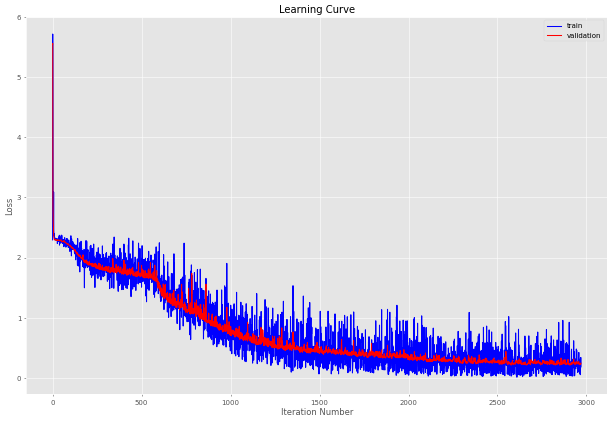

CPU times: user 3min 6s, sys: 57.9 s, total: 4min 4s
Wall time: 2min 5s


In [66]:
%%time
epoch = 1   # エポック
lr=1    # 学習率
batch_size = 20   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "Sigmoid-Sigmoid-Softmax, SimpleInit, SGD" 

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SigmoidLayer,        {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SigmoidLayer,        {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose = verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline1 = pipeline
columns1 = columns

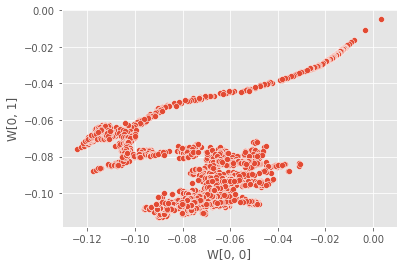

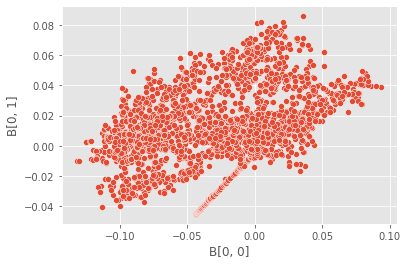

In [67]:
df = pd.DataFrame(data=pipeline1["classifier"].layer[2].W_log, columns=["W[0, 0]", "W[0, 1]"])
plt.figure()
# plt.title("PC1 vs PC2 (hue: Region)")
sns.scatterplot(data=df, x="W[0, 0]", y="W[0, 1]", palette="rainbow");

df = pd.DataFrame(data=pipeline1["classifier"].layer[2].B_log, columns=["B[0, 0]", "B[0, 1]"])
plt.figure()
# plt.title("PC1 vs PC2 (hue: Region)")
sns.scatterplot(data=df, x="B[0, 0]", y="B[0, 1]", palette="rainbow");

#### ・【パターン2】Tanh-Tanh-Softmax, SimpleInit, SGD

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 9 9 4]
y_predict_proba:
[[2.80768499e-05 1.28536972e-03 6.55353765e-06 ... 2.61010473e-06
  9.03530741e-03 8.50902896e-04]
 [2.25594706e-06 1.02722882e-06 1.54907568e-04 ... 9.18347375e-10
  5.15002535e-05 9.64404453e-07]
 [2.35809390e-05 7.45358684e-05 9.86870750e-03 ... 7.86521570e-08
  6.24203895e-04 1.17077420e-05]
 ...
 [4.51275903e-05 3.90175316e-03 8.94622851e-07 ... 3.71360432e-03
  3.19311070e-02 3.58535876e-01]
 [4.49836530e-03 4.97703170e-08 5.89664533e-04 ... 6.60020155e-03
  6.46955193e-03 9.80717121e-01]
 [1.23871113e-05 1.20577113e-08 1.55339540e-05 ... 2.10290682e-04
  2.38178897e-05 5.64338584e-04]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,64,0,0,0,0,0,0,0,0,0
1,0,74,0,0,0,1,1,0,0,0
2,0,1,48,0,0,0,1,1,1,0
3,1,0,0,51,0,7,0,0,1,1
4,0,0,0,0,53,0,1,0,0,5
5,3,0,0,0,0,49,0,0,0,0
6,2,0,0,0,0,0,61,0,0,0
7,0,2,0,0,1,0,0,59,0,2
8,1,3,1,0,0,3,1,0,45,0
9,0,0,1,0,2,1,0,1,2,48




スコアボード1:


,"ScratchDNN(epoch:1, iter:2970, b_size:20, lr:1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, SimpleInit, SGD)"
Accuacy,0.913333,0.920000
Precision,0.915143,0.921730
Recall,0.910259,0.916963
F1,0.910994,0.917353


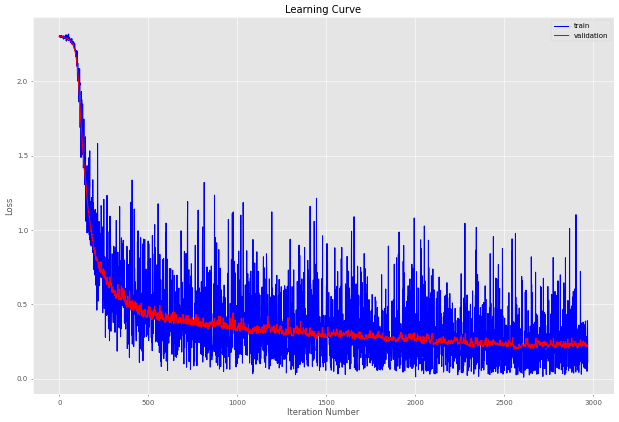

CPU times: user 5min 10s, sys: 2min 37s, total: 7min 47s
Wall time: 3min 59s


In [68]:
%%time
epoch = 1   # エポック
lr=0.1    # 学習率
batch_size = 20   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "Tanh-Tanh-Softmax, SimpleInit, SGD" 

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose = verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline2 = pipeline
columns2 = columns

#### ・【パターン3】Tanh-Tanh-Softmax, XavierInit, SGD

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 9 9 4]
y_predict_proba:
[[5.60309120e-06 5.26442064e-04 1.67362331e-06 ... 2.14958676e-06
  9.94642711e-04 2.87929457e-04]
 [5.60122236e-06 3.38623148e-07 3.78203970e-04 ... 2.36638136e-09
  1.27757779e-05 2.80379846e-06]
 [4.43575937e-05 6.72423117e-05 1.06834992e-02 ... 8.96013386e-08
  3.68311567e-04 1.78783881e-05]
 ...
 [3.56808734e-05 6.33194495e-04 5.14655353e-07 ... 2.97692037e-03
  9.04228355e-03 4.41405699e-01]
 [6.70729715e-04 9.70744067e-09 1.33505852e-04 ... 3.96377157e-03
  3.28014563e-03 9.91641667e-01]
 [2.12817972e-06 2.38579869e-09 3.50842061e-06 ... 1.65854078e-04
  7.23733720e-06 1.91365766e-04]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,62,0,0,0,0,0,1,0,1,0
1,0,74,0,0,0,1,1,0,0,0
2,0,1,49,0,0,0,0,1,1,0
3,0,0,0,54,0,5,0,0,1,1
4,0,0,0,0,54,0,0,0,0,5
5,1,0,0,0,0,51,0,0,0,0
6,0,0,0,0,0,0,63,0,0,0
7,0,1,0,0,1,0,0,61,0,1
8,0,3,1,0,0,0,1,0,49,0
9,0,0,0,0,2,1,0,1,0,51




スコアボード1:


,"ScratchDNN(epoch:1, iter:2970, b_size:20, lr:1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, XavierInit, SGD)"
Accuacy,0.913333,0.920000,0.946667
Precision,0.915143,0.921730,0.947193
Recall,0.910259,0.916963,0.945382
F1,0.910994,0.917353,0.945400


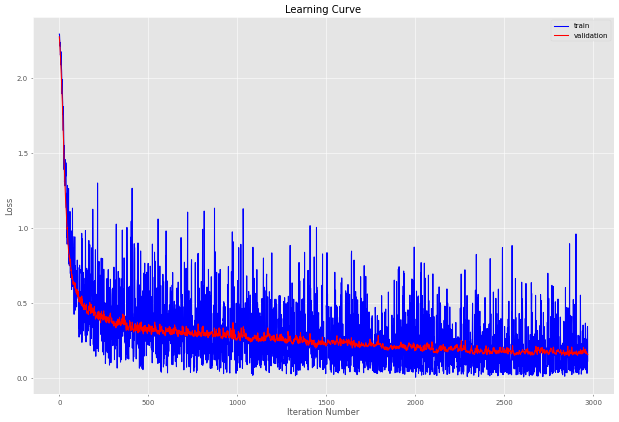

CPU times: user 5min 9s, sys: 2min 39s, total: 7min 48s
Wall time: 4min


In [69]:
%%time
epoch = 1   # エポック
lr=0.1    # 学習率
batch_size = 20   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "Tanh-Tanh-Softmax, XavierInit, SGD" 

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":XavierInitializer(), "optimizer":SGD(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":XavierInitializer(), "optimizer":SGD(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1


pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline3 = pipeline
columns3 = columns

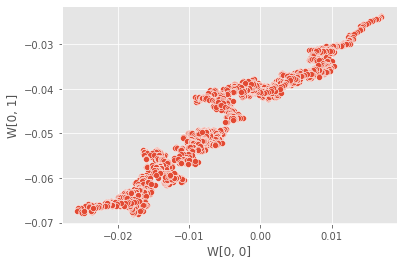

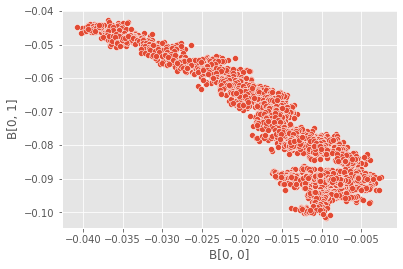

In [70]:
df = pd.DataFrame(data=pipeline3["classifier"].layer[2].W_log, columns=["W[0, 0]", "W[0, 1]"])
plt.figure()
# plt.title("PC1 vs PC2 (hue: Region)")
sns.scatterplot(data=df, x="W[0, 0]", y="W[0, 1]", palette="rainbow");

df = pd.DataFrame(data=pipeline3["classifier"].layer[2].B_log, columns=["B[0, 0]", "B[0, 1]"])
plt.figure()
# plt.title("PC1 vs PC2 (hue: Region)")
sns.scatterplot(data=df, x="B[0, 0]", y="B[0, 1]", palette="rainbow");

#### ・【パターン4】Tanh-Tanh-Softmax, XavierInit, AdaGrad

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 9 9 4]
y_predict_proba:
[[8.71942890e-05 1.03628137e-03 4.73312757e-05 ... 6.82030654e-05
  5.01464733e-03 1.27961882e-03]
 [6.06131116e-05 7.72736279e-06 3.78545510e-04 ... 3.08622551e-07
  4.70444587e-05 6.42034301e-06]
 [2.06897502e-04 2.49913839e-04 1.29805561e-02 ... 6.11723443e-06
  2.24293430e-03 1.39023088e-04]
 ...
 [3.00434640e-04 2.40971971e-03 1.60532763e-05 ... 7.82833264e-03
  8.15579623e-03 5.36856229e-01]
 [1.15076647e-03 8.18754603e-07 6.11784390e-04 ... 5.38328834e-03
  3.45460395e-03 9.87145848e-01]
 [4.93687415e-05 6.48423619e-07 7.41250333e-05 ... 5.67402503e-04
  1.19308400e-04 1.43873536e-03]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,62,0,1,0,0,0,1,0,0,0
1,0,73,0,0,0,0,1,0,2,0
2,0,1,49,0,0,0,0,1,1,0
3,0,0,0,55,0,4,0,0,1,1
4,0,0,0,0,57,0,0,0,0,2
5,1,0,0,0,0,51,0,0,0,0
6,0,0,0,0,0,0,63,0,0,0
7,0,1,0,0,1,0,0,61,0,1
8,0,2,2,0,0,1,0,0,49,0
9,0,0,0,0,2,0,0,1,1,51




スコアボード1:


,"ScratchDNN(epoch:1, iter:2970, b_size:20, lr:1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, XavierInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, Tanh-Tanh-Softmax, XavierInit, AdaGrad)"
Accuacy,0.913333,0.920000,0.946667,0.951667
Precision,0.915143,0.921730,0.947193,0.950737
Recall,0.910259,0.916963,0.945382,0.950790
F1,0.910994,0.917353,0.945400,0.950332


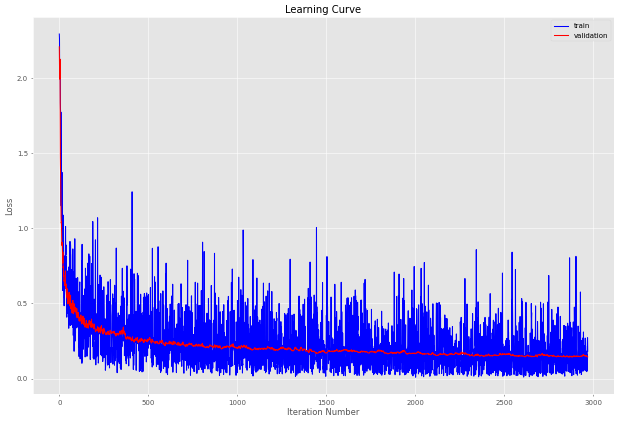

CPU times: user 5min 23s, sys: 2min 48s, total: 8min 11s
Wall time: 4min 13s


In [71]:
%%time
epoch = 1   # エポック
lr=0.01    # 学習率
batch_size = 20   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "Tanh-Tanh-Softmax, XavierInit, AdaGrad"

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":XavierInitializer(), "optimizer":AdaGrad(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":XavierInitializer(), "optimizer":AdaGrad(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline4 = pipeline
columns4 = columns

#### ・【パターン5】Tanh-ReLU-Softmax, XavierInit-HeInit, AdaGrad

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 9 9 4]
y_predict_proba:
[[7.01307531e-06 4.29604424e-04 1.51996198e-05 ... 2.96357230e-06
  1.61965581e-03 4.68864128e-04]
 [3.96666316e-06 6.46008292e-08 1.43814442e-04 ... 2.13568907e-08
  3.84052985e-06 6.16519450e-09]
 [7.55907452e-05 7.63662746e-06 1.55261587e-02 ... 3.42351434e-06
  4.15517393e-05 4.08916408e-06]
 ...
 [2.44432265e-04 5.79838408e-04 8.68158528e-06 ... 7.80352961e-03
  1.95195028e-03 5.59911979e-01]
 [4.93792530e-04 2.56615504e-07 4.05381129e-04 ... 2.06481625e-03
  2.95611873e-03 9.93461936e-01]
 [3.38210354e-07 1.51472339e-08 4.22203989e-05 ... 4.36219585e-05
  6.34146443e-07 2.66173944e-05]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,62,0,1,0,0,0,1,0,0,0
1,0,73,0,0,0,0,1,0,2,0
2,0,1,50,0,0,0,0,1,0,0
3,0,0,0,57,0,4,0,0,0,0
4,0,0,0,0,58,0,0,0,0,1
5,1,0,0,0,0,51,0,0,0,0
6,0,0,0,0,0,0,63,0,0,0
7,0,0,0,1,1,0,0,62,0,0
8,0,2,1,0,0,1,0,0,50,0
9,0,0,0,0,2,0,0,1,1,51




スコアボード1:


,"ScratchDNN(epoch:1, iter:2970, b_size:20, lr:1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, XavierInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, Tanh-Tanh-Softmax, XavierInit, AdaGrad)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, Tanh-ReLU-Softmax, XavierInit-HeInit, AdaGrad)"
Accuacy,0.913333,0.920000,0.946667,0.951667,0.961667
Precision,0.915143,0.921730,0.947193,0.950737,0.961263
Recall,0.910259,0.916963,0.945382,0.950790,0.961101
F1,0.910994,0.917353,0.945400,0.950332,0.960851


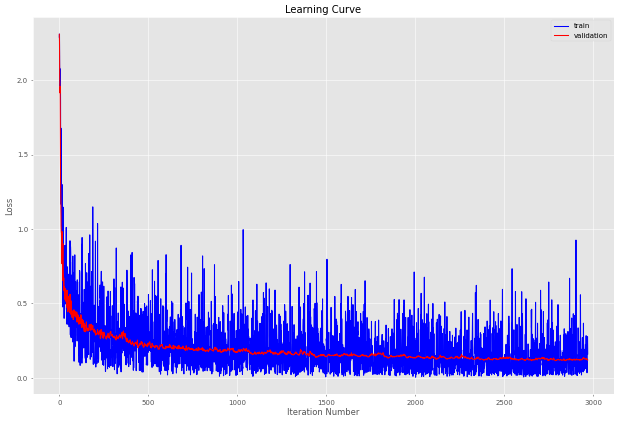

CPU times: user 4min 29s, sys: 2min 4s, total: 6min 34s
Wall time: 3min 21s


In [72]:
%%time
epoch = 1   # エポック
lr=0.01    # 学習率
batch_size = 20   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "Tanh-ReLU-Softmax, XavierInit-HeInit, AdaGrad"

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":XavierInitializer(), "optimizer":AdaGrad(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline5 = pipeline
columns5 = columns

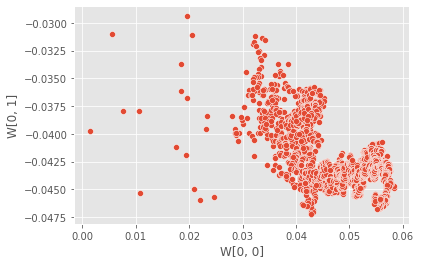

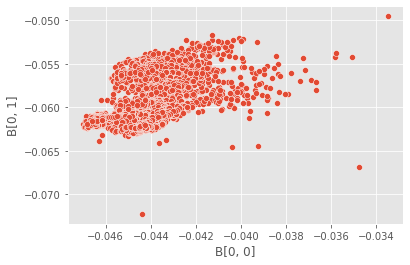

In [73]:
df = pd.DataFrame(data=pipeline5["classifier"].layer[2].W_log, columns=["W[0, 0]", "W[0, 1]"])
plt.figure()
# plt.title("PC1 vs PC2 (hue: Region)")
sns.scatterplot(data=df, x="W[0, 0]", y="W[0, 1]", palette="rainbow");

df = pd.DataFrame(data=pipeline5["classifier"].layer[2].B_log, columns=["B[0, 0]", "B[0, 1]"])
plt.figure()
# plt.title("PC1 vs PC2 (hue: Region)")
sns.scatterplot(data=df, x="B[0, 0]", y="B[0, 1]", palette="rainbow");

#### ・【パターン6】ReLU-ReLU-Softmax, HeInit, AdaGrad

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 9 9 4]
y_predict_proba:
[[3.67852518e-06 1.01795022e-04 1.35317426e-05 ... 3.65654418e-06
  5.23201203e-04 3.64622478e-04]
 [4.74508939e-08 1.22396421e-09 9.24328602e-07 ... 2.14185284e-10
  8.42525634e-08 5.56228051e-11]
 [1.57060821e-04 5.83466271e-06 1.18237807e-03 ... 1.90796214e-06
  7.42174374e-05 9.43595068e-07]
 ...
 [1.57476676e-04 4.25812190e-04 2.32538403e-06 ... 5.20248707e-03
  2.41010212e-03 7.82458895e-01]
 [6.41175085e-04 6.35893573e-06 9.14867352e-04 ... 9.91459150e-03
  1.43399235e-03 9.85813520e-01]
 [5.60579612e-08 1.02423080e-07 5.99636425e-06 ... 8.28540195e-06
  7.62213210e-07 5.36186536e-06]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,62,0,1,0,0,0,1,0,0,0
1,0,74,0,0,0,0,2,0,0,0
2,0,0,51,0,0,0,0,1,0,0
3,0,0,0,59,0,2,0,0,0,0
4,0,0,0,0,58,0,0,0,0,1
5,1,0,0,0,0,51,0,0,0,0
6,0,0,0,0,0,0,63,0,0,0
7,0,0,0,1,1,0,0,62,0,0
8,0,1,1,0,0,0,0,0,52,0
9,0,0,0,0,2,0,0,1,1,51




スコアボード1:


,"ScratchDNN(epoch:1, iter:2970, b_size:20, lr:1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, XavierInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, Tanh-Tanh-Softmax, XavierInit, AdaGrad)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, Tanh-ReLU-Softmax, XavierInit-HeInit, AdaGrad)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, ReLU-ReLU-Softmax, HeInit, AdaGrad)"
Accuacy,0.913333,0.920000,0.946667,0.951667,0.961667,0.971667
Precision,0.915143,0.921730,0.947193,0.950737,0.961263,0.971467
Recall,0.910259,0.916963,0.945382,0.950790,0.961101,0.971322
F1,0.910994,0.917353,0.945400,0.950332,0.960851,0.971197


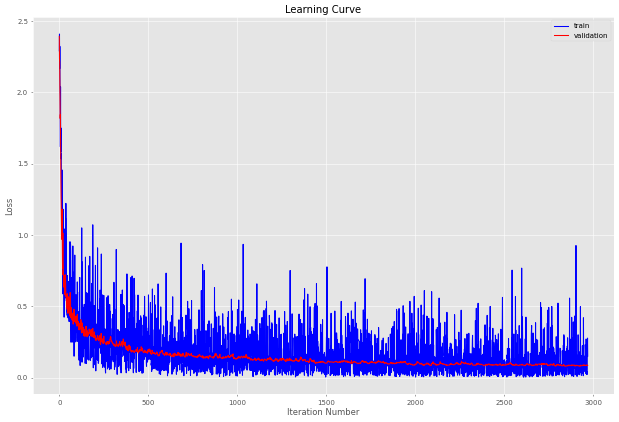

CPU times: user 2min 50s, sys: 45 s, total: 3min 35s
Wall time: 1min 50s


In [74]:
%%time
epoch = 1   # エポック
lr=0.01    # 学習率
batch_size = 20   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "ReLU-ReLU-Softmax, HeInit, AdaGrad"

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline6 = pipeline
columns6 = columns

#### ・【パターン7】ReLU-ReLU-ReLU-Softmax, HeInit, AdaGrad

y_true:
[3 6 6 ... 9 9 4]
y_predict:
[3 6 6 ... 9 9 4]
y_predict_proba:
[[8.72838394e-08 1.39291582e-05 8.80830306e-06 ... 2.95897551e-06
  6.89138692e-05 2.04039003e-04]
 [4.21335217e-08 1.69711025e-10 8.60110744e-08 ... 4.97642357e-11
  2.31877740e-08 1.11544899e-12]
 [3.51607621e-04 4.77406050e-07 1.95723461e-04 ... 1.00538581e-06
  1.00264167e-05 4.14347854e-07]
 ...
 [6.63034391e-05 4.25418601e-04 2.58214114e-05 ... 8.62093753e-03
  1.41224217e-03 8.74463183e-01]
 [2.04318548e-05 8.30038168e-07 1.72261407e-05 ... 9.48167244e-04
  7.23030192e-05 9.98667893e-01]
 [3.94676539e-07 1.99794950e-07 3.05190445e-05 ... 1.06896360e-05
  9.03246145e-08 2.80733714e-07]]


###Confusion matrix（混同行列）###


,0,1,2,3,4,5,6,7,8,9
0,63,0,0,0,0,0,1,0,0,0
1,0,72,0,0,0,0,4,0,0,0
2,0,0,51,0,0,0,0,1,0,0
3,0,0,0,58,0,3,0,0,0,0
4,0,0,0,0,59,0,0,0,0,0
5,1,0,0,0,0,51,0,0,0,0
6,0,0,0,0,0,0,63,0,0,0
7,0,0,0,0,0,0,1,62,0,1
8,0,1,0,0,0,0,0,0,53,0
9,0,0,0,0,1,0,0,0,1,53




スコアボード1:


,"ScratchDNN(epoch:1, iter:2970, b_size:20, lr:1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, XavierInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, Tanh-Tanh-Softmax, XavierInit, AdaGrad)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, Tanh-ReLU-Softmax, XavierInit-HeInit, AdaGrad)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, ReLU-ReLU-Softmax, HeInit, AdaGrad)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, ReLU-ReLU-ReLU-Softmax, HeInit, AdaGrad)"
Accuacy,0.913333,0.920000,0.946667,0.951667,0.961667,0.971667,0.975000
Precision,0.915143,0.921730,0.947193,0.950737,0.961263,0.971467,0.975859
Recall,0.910259,0.916963,0.945382,0.950790,0.961101,0.971322,0.975797
F1,0.910994,0.917353,0.945400,0.950332,0.960851,0.971197,0.975464


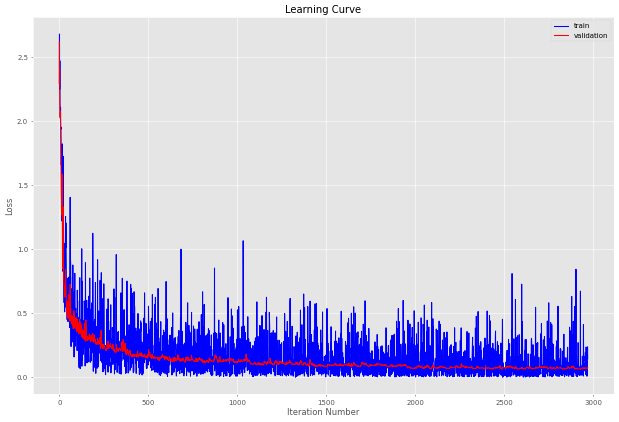

CPU times: user 3min 34s, sys: 57.4 s, total: 4min 31s
Wall time: 2min 19s


In [75]:
%%time
epoch = 1   # エポック
lr=0.01    # 学習率
batch_size = 20   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "ReLU-ReLU-ReLU-Softmax, HeInit, AdaGrad"

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":300, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":300, "n_nodes_current":200, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifierLayer8(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline7 = pipeline
columns7 = columns

## 【問題1】全結合層のクラス化
全結合層のクラス化を行なってください。


以下に雛形を載せました。コンストラクタで重みやバイアスの初期化をして、あとはフォワードとバックワードのメソッドを用意します。重みW、バイアスB、およびフォワード時の入力Xをインスタンス変数として保持しておくことで、煩雑な入出力は不要になります。


なお、インスタンスも引数として渡すことができます。そのため、初期化方法のインスタンスinitializerをコンストラクタで受け取れば、それにより初期化が行われます。渡すインスタンスを変えれば、初期化方法が変えられます。


また、引数として自身のインスタンスselfを渡すこともできます。これを利用してself.optimizer.update(self)という風に層の重みの更新が可能です。更新に必要な値は複数ありますが、すべて全結合層が持つインスタンス変数にすることができます。


初期化方法と最適化手法のクラスについては後述します。

## 【問題2】初期化方法のクラス化
初期化を行うコードをクラス化してください。


前述のように、全結合層のコンストラクタに初期化方法のインスタンスを渡せるようにします。以下の雛形に必要なコードを書き加えていってください。標準偏差の値（sigma）はコンストラクタで受け取るようにすることで、全結合層のクラス内にこの値（sigma）を渡さなくてすむようになります。


これまで扱ってきた初期化方法はSimpleInitializerクラスと名付けることにします。

## 【問題3】最適化手法のクラス化
最適化手法のクラス化を行なってください。


最適化手法に関しても初期化方法同様に全結合層にインスタンスとして渡します。バックワードのときにself.optimizer.update(self)のように更新できるようにします。以下の雛形に必要なコードを書き加えていってください。


これまで扱ってきた最適化手法はSGDクラス（Stochastic Gradient Descent、確率的勾配降下法）として作成します。

## 【問題4】活性化関数のクラス化
活性化関数のクラス化を行なってください。


ソフトマックス関数のバックプロパゲーションには交差エントロピー誤差の計算も含む実装を行うことで計算が簡略化されます。


発展的要素
活性化関数や重みの初期値、最適化手法に関してこれまで見てきた以外のものを実装していきます。

## 【問題5】ReLUクラスの作成
現在一般的に使われている活性化関数であるReLU（Rectified Linear Unit）をReLUクラスとして実装してください。


ReLUは以下の数式です。

$$
f(x) = ReLU(x) = \begin{cases}
x  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases}
$$

一方、バックプロパゲーションのための $x$ に関する $f(x)$ の微分は以下のようになります。

\frac{\partial f(x)}{\partial x} = \begin{cases}
1  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases}

数学的には微分可能ではないですが、 $x=0$ のとき $0$ とすることで対応しています。


フォワード時の $x$ の正負により、勾配を逆伝播するかどうかが決まるということになります。

## 【問題6】重みの初期値
ここまでは重みやバイアスの初期値は単純にガウス分布で、標準偏差をハイパーパラメータとして扱ってきました。しかし、どのような値にすると良いかが知られています。シグモイド関数やハイパボリックタンジェント関数のときは Xavierの初期値 （またはGlorotの初期値）、ReLUのときは Heの初期値 が使われます。


XavierInitializerクラスと、HeInitializerクラスを作成してください。

- Xavierの初期値<br>
Xavierの初期値における標準偏差 $\sigma$ は次の式で求められます。
$$
\sigma = \frac{1}{\sqrt{n}}
$$
- Heの初期値<br>
Heの初期値における標準偏差 $\sigma$ は次の式で求められます。

$$
\sigma = \sqrt{\frac{2}{n}}
$$
$n$ : 前の層のノード数

## 【問題7】最適化手法
学習率は学習過程で変化させていく方法が一般的です。基本的な手法である AdaGrad のクラスを作成してください。

まず、これまで使ってきたSGDを確認します。

$$
W_i^{\prime} = W_i - \alpha E(\frac{\partial L}{\partial W_i}) \\
B_i^{\prime} = B_i - \alpha E(\frac{\partial L}{\partial B_i})
$$

$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的にはすべて同じとする）


$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配


$E()$ : ミニバッチ方向にベクトルの平均を計算


続いて、AdaGradです。バイアスの数式は省略しますが、重みと同様のことをします。


更新された分だけその重みに対する学習率を徐々に下げていきます。イテレーションごとの勾配の二乗和 $H$ を保存しておき、その分だけ学習率を小さくします。


学習率は重み一つひとつに対して異なることになります。

## 【問題8】クラスの完成
任意の構成で学習と推定が行えるScratchDeepNeuralNetrowkClassifierクラスを完成させてください。

## 【問題9】学習と推定
層の数や活性化関数を変えたいくつかのネットワークを作成してください。そして、MNISTのデータを学習・推定し、Accuracyを計算してください。

### 【問題9 解答】

#### ・評価結果まとめ

In [76]:
score_board1.display()

###スコアボード###


,"ScratchDNN(epoch:1, iter:2970, b_size:20, lr:1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, SimpleInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, XavierInit, SGD)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, Tanh-Tanh-Softmax, XavierInit, AdaGrad)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, Tanh-ReLU-Softmax, XavierInit-HeInit, AdaGrad)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, ReLU-ReLU-Softmax, HeInit, AdaGrad)","ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, ReLU-ReLU-ReLU-Softmax, HeInit, AdaGrad)"
Accuacy,0.913333,0.920000,0.946667,0.951667,0.961667,0.971667,0.975000
Precision,0.915143,0.921730,0.947193,0.950737,0.961263,0.971467,0.975859
Recall,0.910259,0.916963,0.945382,0.950790,0.961101,0.971322,0.975797
F1,0.910994,0.917353,0.945400,0.950332,0.960851,0.971197,0.975464


■ScratchDNN(epoch:1, iter:2970, b_size:20, lr:1, Sigmoid-Sigmoid-Softmax, SimpleInit, SGD)


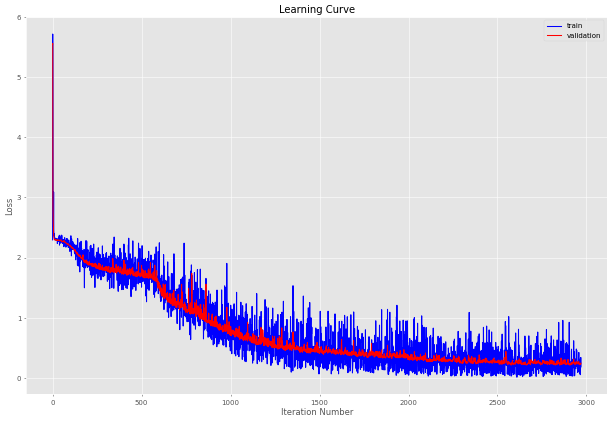

■ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, SimpleInit, SGD)


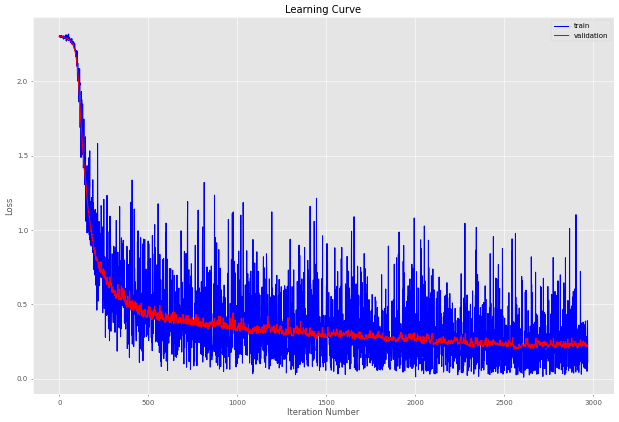

■ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.1, Tanh-Tanh-Softmax, XavierInit, SGD)


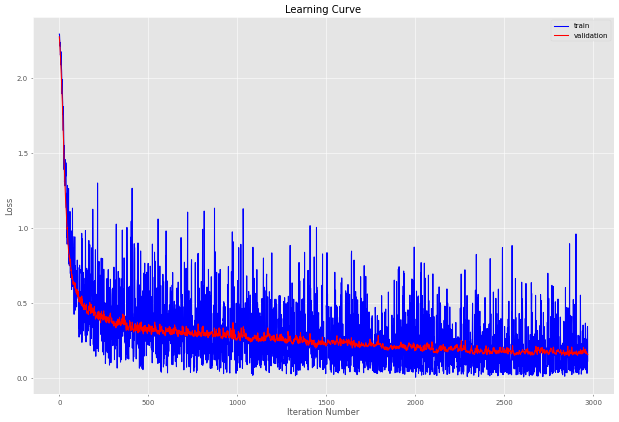

■ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, Tanh-Tanh-Softmax, XavierInit, AdaGrad)


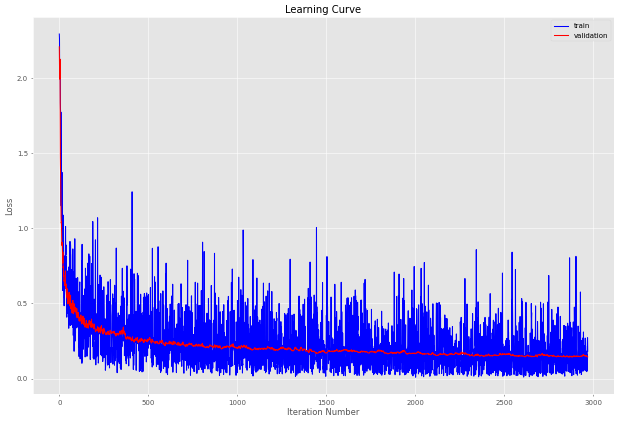

■ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, Tanh-ReLU-Softmax, XavierInit-HeInit, AdaGrad)


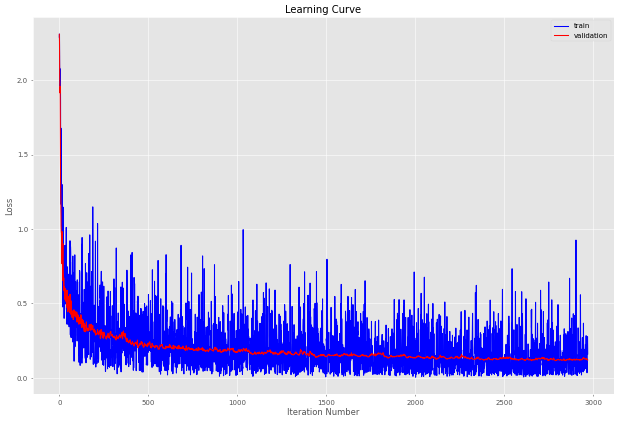

■ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, ReLU-ReLU-Softmax, HeInit, AdaGrad)


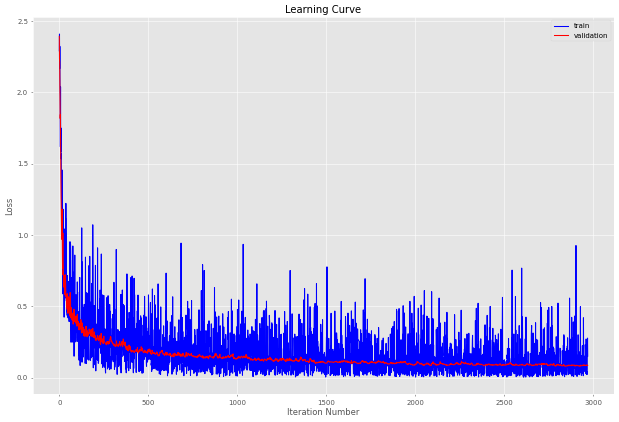

■ScratchDNN(epoch:1, iter:2970, b_size:20, lr:0.01, ReLU-ReLU-ReLU-Softmax, HeInit, AdaGrad)


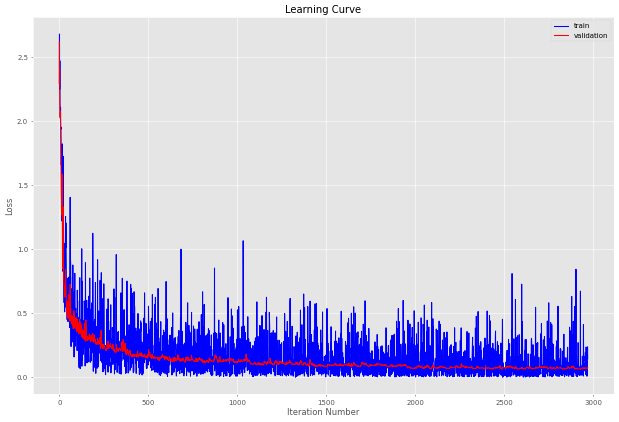

In [77]:
# 学習曲線をプロット
print("■" + columns1)
pipeline1["classifier"].plot_learning_curve()
print("■" + columns2)
pipeline2["classifier"].plot_learning_curve()
print("■" + columns3)
pipeline3["classifier"].plot_learning_curve()
print("■" + columns4)
pipeline4["classifier"].plot_learning_curve()
print("■" + columns5)
pipeline5["classifier"].plot_learning_curve()
print("■" + columns6)
pipeline6["classifier"].plot_learning_curve()
print("■" + columns7)
pipeline7["classifier"].plot_learning_curve()

#### ・考察
今回試したテストパターンは下記の通り。
- 【パターン1】Sigmoid-Sigmoid-Softmax, SimpleInit, SGD
- 【パターン2】Tanh-Tanh-Softmax, SimpleInit, SGD
- 【パターン3】Tanh-Tanh-Softmax, XavierInit, SGD
- 【パターン4】Tanh-Tanh-Softmax, XavierInit, AdaGrad
- 【パターン5】Tanh-ReLU-Softmax, XavierInit-HeInitializer, AdaGrad
- 【パターン6】ReLU-ReLU-Softmax, HeInit, AdaGrad
- 【パターン7】ReLU-ReLU-ReLU-Softmax, HeInit, AdaGrad

<br>

上記の各テスト結果から得られた情報を以下にまとめる。

- 3種類の活性化関数について、学習速度が速かった（＝損失が0.5を下回るイテレーション回数が少なかった）順に並べると下記の通り。

      ReLU関数のみ > Tanh関数 + ReLU関数 > Tanh関数のみ > シグモイド関数のみ

- Tanh関数を用いた場合は、SimpleInitializerよりもXavierInitializerを用いたほうが学習速度が速かった。
      損失が0.5に達したイテレーション回数：
        ・【パターン2】SimpleInitializer ⇒ 約400
        ・【パターン3】XavierInitializer ⇒ 約125

- ReLU関数を用いた場合は、学習に要するCPU実行時間が他に比べて短かった。
      学習・推定等に要したCPU実行時間
        ・【パターン1】Sigmoid-Sigmoid-Softmax, SimpleInit, SGD　⇒　2min 12s
        ・【パターン4】Tanh-Tanh-Softmax, XavierInit, AdaGrad　⇒　4min 7s
        ・【パターン6】ReLU-ReLU-Softmax, HeInit, AdaGrad　⇒　1min 54s

- 各パターンの推定精度（Accuracy）について、上位４パターンを並べると下記の通りとなった。
        ・【パターン7】ReLU-ReLU-ReLU-Softmax, HeInit, AdaGrad　⇒ 0.975000
        ・【パターン6】ReLU-ReLU-Softmax, HeInit, AdaGrad ⇒ 0.971667
        ・【パターン5】Tanh-ReLU-Softmax, XavierInit-HeInitializer, AdaGrad⇒ 0.961667
        ・【パターン4】Tanh-Tanh-Softmax, XavierInit, AdaGrad ⇒ 0.951667
        パターン6とパターン7を見比べると、層の数を増やすことで若干だが推定精度を向上させられることも確認できた。

<br>

以上から、学習速度、CPU実行時間、推定精度の全ての点においてReLUが最良の指標を示したので、特に制約が無ければ活性化関数にはReLUを使用することが望ましいと言える。

## 【その他】

### ●その他の動作確認（失敗例）

#### ・Tanh-Tanh-Softmax, SimpleInit, SGD

In [ ]:
%%time
epoch = 1   # エポック
lr=0.01    # 学習率
batch_size = 20   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose = verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline2 = pipeline
columns2 = columns

#### ・Tanh-Tanh-Softmax, XavierInit, AdaGrad

In [ ]:
%%time
epoch = 1   # エポック
lr=1    # 学習率
batch_size = 20   # バッチサイズ
early_stop = 1000   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = True  # デバッグ情報出力のスイッチ

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":XavierInitializer(), "optimizer":AdaGrad(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":XavierInitializer(), "optimizer":AdaGrad(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline2 = pipeline
columns2 = columns

#### ・ReLU-ReLU-Softmax, XavierInit, SGD

In [ ]:
%%time
epoch = 1   # エポック
lr=0.01    # 学習率
batch_size = 20   # バッチサイズ
verbose = False  # デバッグ情報出力のスイッチ

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":XavierInitializer(), "optimizer":SGD(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":XavierInitializer(), "optimizer":SGD(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":XavierInitializer(sigma=0.01), "optimizer":SGD(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        random_state=0, verbose = verbose)
    )
])

# X = X_train1[:5940]
# Xt = X_test1[:60]
# y = y_train1[:5940]
# yt = y_test1[:60]
X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline2 = pipeline
columns2 = columns

#### ・ReLU-ReLU-Softmax, HeInit, AdaGrad

In [ ]:
%%time
epoch = 1   # エポック
lr=0.01    # 学習率
batch_size = 20   # バッチサイズ
early_stop = 1000   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline2 = pipeline
columns2 = columns

#### ・ReLU-ReLU-Softmax, HeInit, AdaGrad

In [ ]:
%%time
epoch = 1   # エポック
lr=0.0001    # 学習率
batch_size = 20   # バッチサイズ
early_stop = 1000   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline2 = pipeline
columns2 = columns

#### ・ReLU-ReLU-Softmax, HeInit, AdaGrad

In [ ]:
%%time
epoch = 1   # エポック
lr=0.00001    # 学習率
batch_size = 20   # バッチサイズ
early_stop = 1000   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline5 = pipeline
columns5 = columns

#### ・ReLU-ReLU-Softmax, HeInit, AdaGrad

In [ ]:
%%time
epoch = 1   # エポック
lr=0.0001    # 学習率
batch_size = 20   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline5 = pipeline
columns5 = columns

#### ・ReLU-ReLU-Softmax, HeInit, AdaGrad

In [ ]:
%%time
epoch = 1   # エポック
lr=0.001    # 学習率
batch_size = 20   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline5 = pipeline
columns5 = columns

#### ・ReLU-Tanh-Softmax, HeInitializer, XavierInitializer, AdaGrad

In [ ]:
%%time
epoch = 1   # エポック
lr=0.00001    # 学習率
batch_size = 20   # バッチサイズ
early_stop = None   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":XavierInitializer(), "optimizer":AdaGrad(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchSimpleNNC(epoch:{}, iter:{}, b_size:{}, lr:{}, 標準化:無し)".format(epoch, int(X.shape[0]/batch_size), batch_size, lr)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline5 = pipeline
columns5 = columns

#### ・Tanh-ReLU-Softmax, XavierInitializer, HeInitializer, AdaGrad

In [ ]:
%%time
epoch = 1   # エポック
lr=0.1    # 学習率
batch_size = 20   # バッチサイズ
early_stop = 1000   # 早期終了する場合のイテレーション回数（デバッグ用）
verbose = False  # デバッグ情報出力のスイッチ
score_board_name = "Tanh-ReLU-Softmax, XavierInitializer, HeInitializer, AdaGrad"

             # LayerClass,          {keywards}
layer_list = [(FullyConnectedLayer, {"n_nodes_prev":784, "n_nodes_current":400, "initializer":XavierInitializer(), "optimizer":AdaGrad(lr)}),
              (TanhLayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":400, "n_nodes_current":200, "initializer":HeInitializer(), "optimizer":AdaGrad(lr)}),
              (ReLULayer,           {"verbose":verbose}),
              (FullyConnectedLayer, {"n_nodes_prev":200, "n_nodes_current":10,  "initializer":SimpleInitializer(sigma=0.01), "optimizer":AdaGrad(lr)}),
              (SoftmaxLayer,        {"verbose":verbose})]

# 変換器と推定器をパイプラインに組み込み
pipeline = Pipeline(steps=[
    # ("scaler", StandardScaler()),      #変換器
    ("classifier", ScratchDeepNeuralNetrowkClassifier(    #推定器
        layer_list=layer_list, 
        epoch=epoch,
        batch_size=batch_size, 
        early_stop=early_stop,
        random_state=0, verbose=verbose)
    )
])

X = X_train1
Xt = X_test1
y = y_train1
yt = y_test1

np.set_printoptions(threshold=100)    #ndarrayの要素の表示数上限を設定

pipeline["classifier"].fit(X, y, Xt, yt)
y_predict = pipeline.predict(Xt)
y_predict_proba = pipeline.predict_proba(Xt)

np.set_printoptions(threshold=1000)    #ndarrayの要素の表示数上限を設定
print("y_true:")
print(yt)
print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
columns="ScratchDNN(epoch:{}, iter:{}, b_size:{}, lr:{}, {})".format(epoch, int(X.shape[0]/batch_size), batch_size, lr, score_board_name)
score_board1.calcurate_scores(yt, y_predict, arg_columns=columns)

# 学習曲線をプロット
pipeline["classifier"].plot_learning_curve()

#モデルのインスタンスを複製
pipeline5 = pipeline
columns5 = columns